In [ ]:
# Team Members : Soumitra Alate, Sagar Pokale
# Ubitname : smalate (50289133)
# Ubitname : sagarpok (50288055)

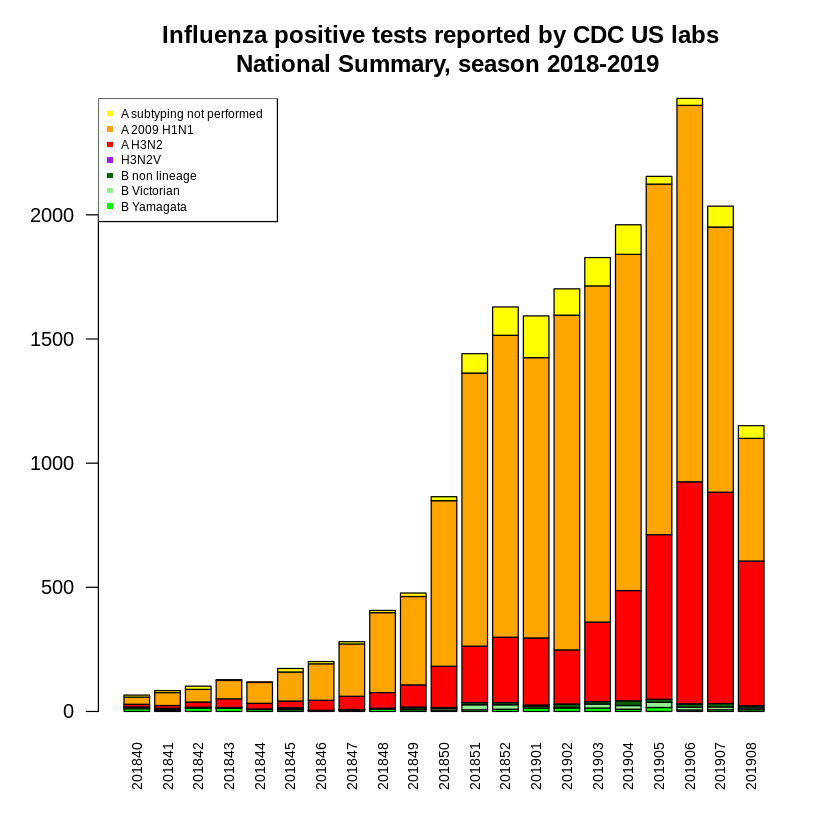

In [80]:
#1.Influenza positive test reported to CDC by U.S Public health Laboratories.
positive_tested_Data=read.csv("/home/sagar/DIC/DICPA2/Lab 1 Final/Lab1_Data/WHO_NREVSS_Public_Health_Labs.csv",header=TRUE,",",skip=1)
par(bg="white")
#par - set graphical parameters
positive_tested_Data_Filtered =(sprintf("%d%02d", positive_tested_Data$YEAR,positive_tested_Data$WEEK))

positive_tested_Data=data.frame(positive_tested_Data$BYam,positive_tested_Data$BVic,positive_tested_Data$B,positive_tested_Data$H3N2v,positive_tested_Data$A..H3,positive_tested_Data$A..2009.H1N1, 
                 positive_tested_Data$A..Subtyping.not.Performed)
#A data frame - convert positive_tested_Data into table where each column contains values of one variable and each row contains one set of values from each column

positive_tested_Data=t(positive_tested_Data)

barplot(as.matrix(positive_tested_Data), main="Influenza positive tests reported by CDC US labs \n National Summary, season 2018-2019",col=c("green","light green"," dark green","purple", "red","orange","yellow"),names.arg = positive_tested_Data_Filtered,  cex.names=0.7,las=2)
#barplot - create bar plot using vertical and horizontal bars
legend("topleft",legend=c("A subtyping not performed","A 2009 H1N1","A H3N2","H3N2V","B non lineage","B Victorian",
                           "B Yamagata"),
       col=c("yellow","orange","red","purple","dark green","light green","green"),
       lty=c(0,0,0,0,0,0,0),pch=c(15,15,15,15,15,15,15) ,cex=0.6)
#legend - add legends to plot

In [18]:
#1.Influenza virus characterstic using pie chart
fludata<-read.csv("/home/sagar/DIC/DICPA2/FluViewPhase2Data/Genetic08.csv")
colnames(fludata) <- c("X.Sub.type","Lineage","Genetic_group","Number","X..of..Sub.type.Total")
subflu2<-subset(fludata, fludata$Number!= 0)
x<-subflu2$Number
lbls<-subflu2$X.Sub.type

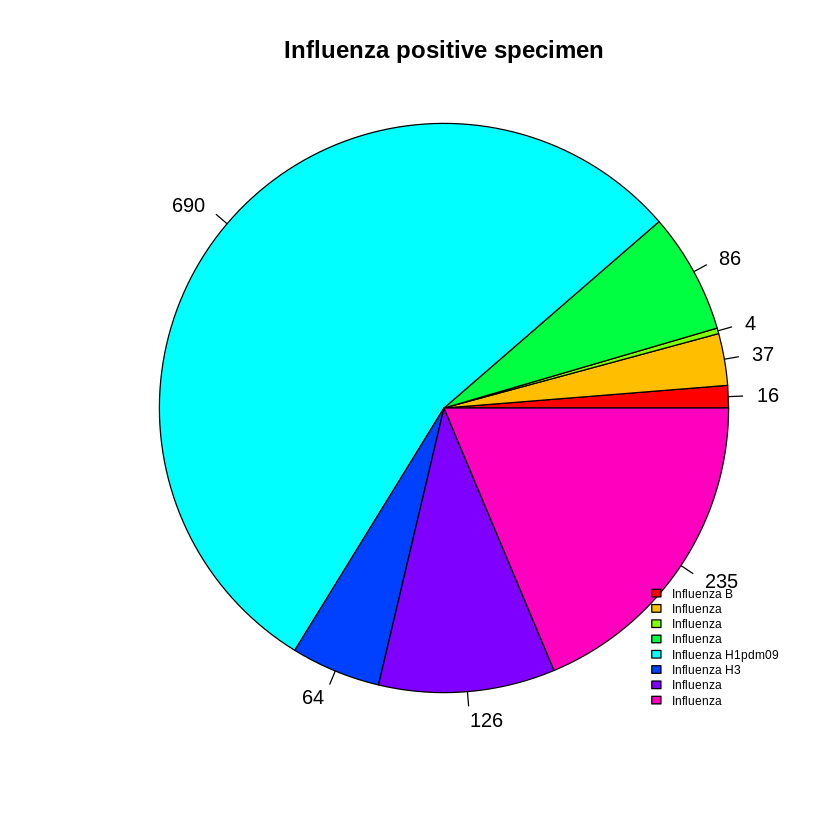

In [19]:

pie(x,labels = x,radius = 1,col=rainbow(length(lbls)),main = "Influenza positive specimen",clockwise=FALSE)
#pie-Draw a pie chart.
legend("bottomright", legend = paste("Influenza",fludata$X.Sub.type), fill=rainbow(length(lbls)), bty="n",cex=0.6)

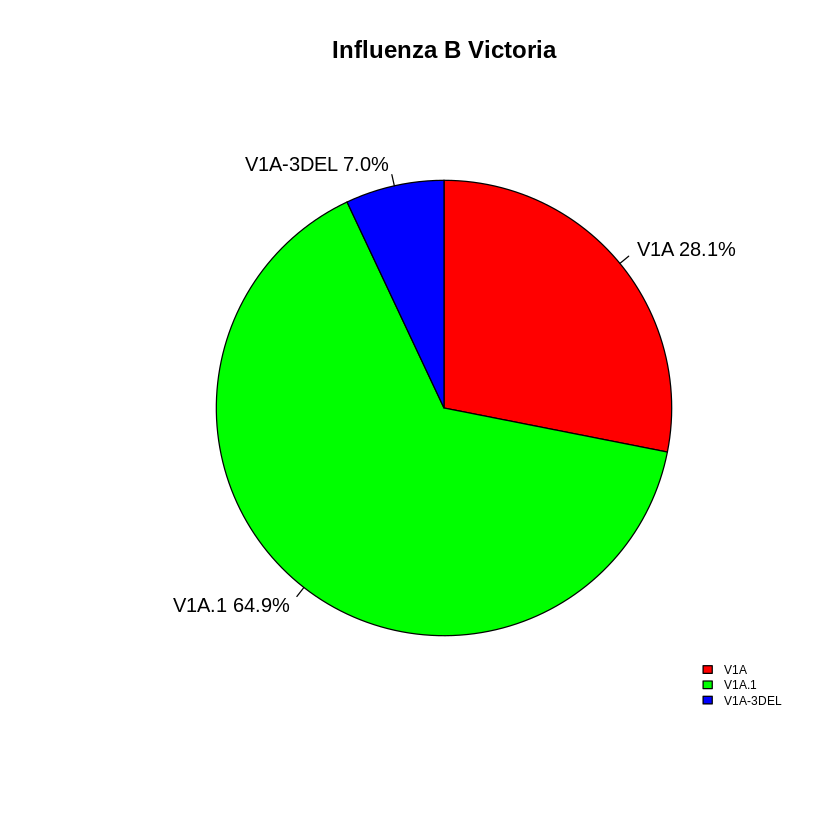

In [20]:
BVict<-subset(fludata, fludata$X.Sub.type == 'B'&& fludata$Lineage=='Victoria' & (fludata$Genetic_group=='V1A'| fludata$Genetic_group=='V1A-3DEL' | fludata$Genetic_group=='V1A.1'))
prcnt<-as.numeric(gsub("[^0-9]", "", BVict$X..of..Sub.type.Total))
lbls1<-BVict$Genetic_group
pie(prcnt,labels = paste(BVict$Genetic_group,BVict$X..of..Sub.type.Total),col=rainbow(length(lbls1)),main = "Influenza B Victoria",clockwise=TRUE)
legend("bottomright", legend = BVict$Genetic_group, fill=rainbow(length(lbls1)), bty="n",cex=0.6)

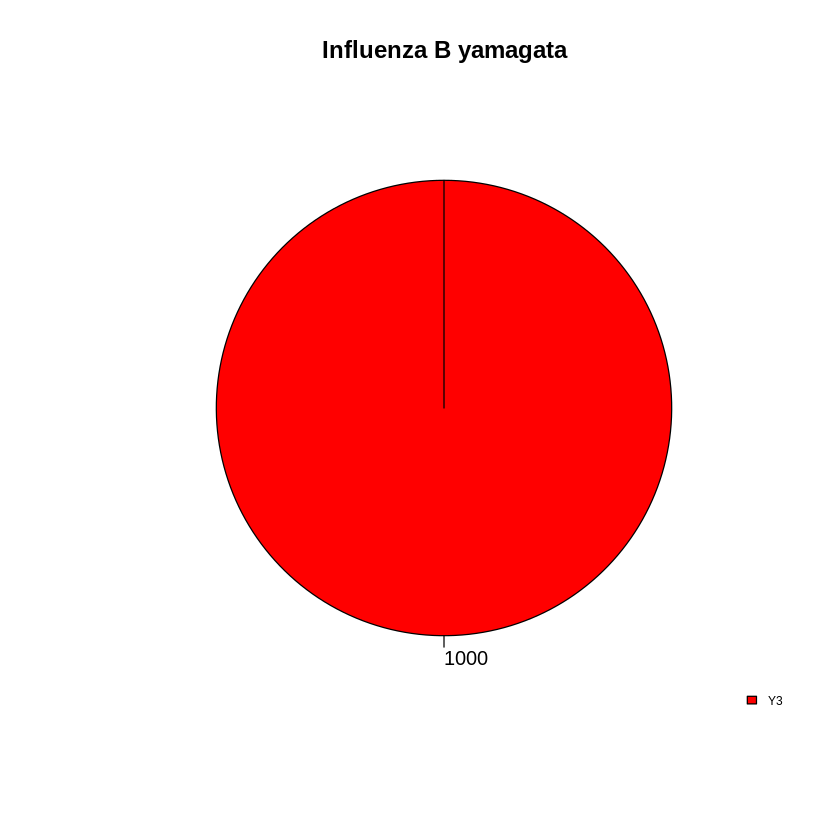

In [21]:
BYam<-subset(fludata, fludata$Lineage=='Yamagata')
BYam$X..of..Sub.type.Total<-gsub("[^0-9]", "", BYam$X..of..Sub.type.Total)
#gsub -function replaces All Digit with space

BYam$X..of..Sub.type.Total<-as.integer(sub("^$", "0", BYam$X..of..Sub.type.Total))

lbls2<-BYam$Genetic_group
pie(BYam$X..of..Sub.type.Total,labels = paste(BYam$X..of..Sub.type.Total),col=rainbow(length(lbls2)),main = "Influenza B yamagata",clockwise=TRUE)
legend("bottomright", legend = BYam$Genetic_group, fill=rainbow(length(lbls2)), bty="n",cex=0.6)

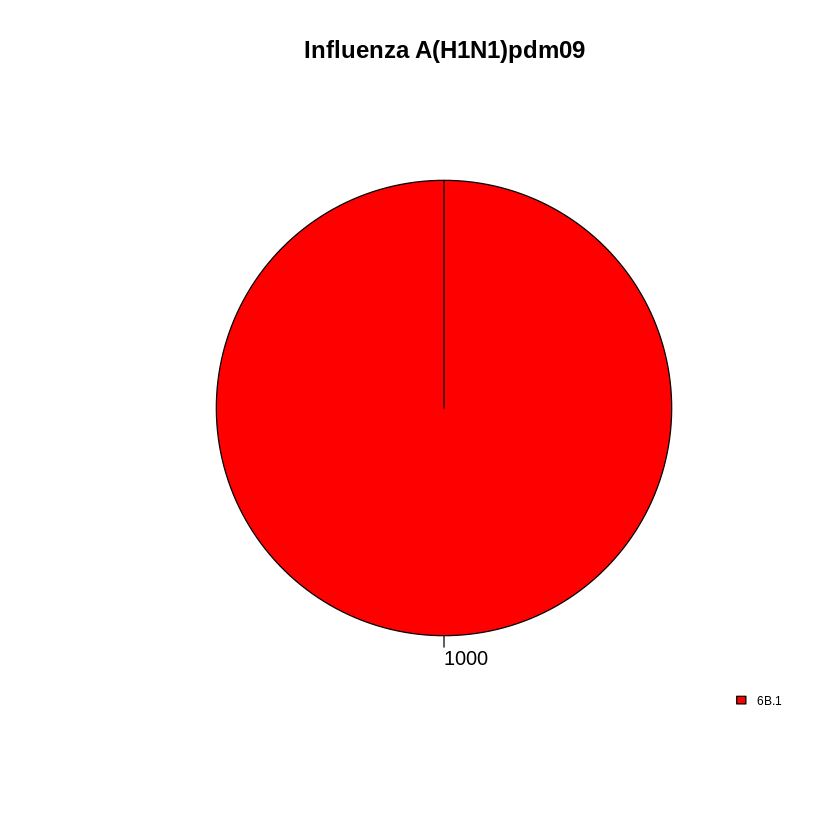

In [22]:
H1pdm<-subset(fludata, fludata$X.Sub.type == 'H1pdm09')
H1pdm$X..of..Sub.type.Total<-gsub("[^0-9]", "", H1pdm$X..of..Sub.type.Total)
H1pdm$X..of..Sub.type.Total<-as.integer(sub("^$", "0", H1pdm$X..of..Sub.type.Total))

lbls3<-H1pdm$Genetic_group
pie(H1pdm$X..of..Sub.type.Total,labels = paste(H1pdm$X..of..Sub.type.Total),col=rainbow(length(lbls3)),main = "Influenza A(H1N1)pdm09",clockwise=TRUE)
legend("bottomright", legend = H1pdm$Genetic_group, fill=rainbow(length(lbls3)), bty="n",cex=0.6)

[1] 151 296 553


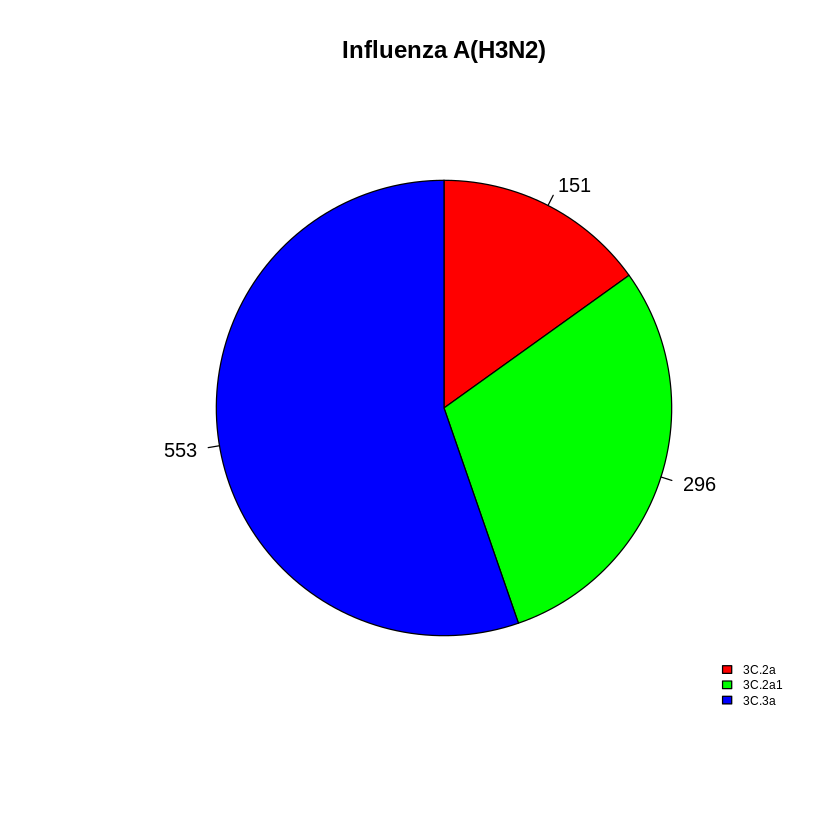

In [23]:
H3<-subset(fludata, fludata$X.Sub.type == 'H3' |fludata$Genetic_group=='3C.2a' | fludata$Genetic_group=='3C.2a1' |fludata$Genetic_group=='3C.3a')
H3$X..of..Sub.type.Total<-gsub("[^0-9]", "", H3$X..of..Sub.type.Total)
H3$X..of..Sub.type.Total<-as.integer(sub("^$", "0", H3$X..of..Sub.type.Total))
print(H3$X..of..Sub.type.Total)
lbls4<-H3$Genetic_group
pie(H3$X..of..Sub.type.Total,labels = paste(H3$X..of..Sub.type.Total),col=rainbow(length(lbls4)),main = "Influenza A(H3N2)",clockwise=TRUE)
legend("bottomright", legend = H3$Genetic_group, fill=rainbow(length(lbls4)), bty="n",cex=0.6)

In [ ]:
#2 .Mortality
mortality <-read.csv(file = "Lab1_Data/Mortality.csv")
mortality$YearWeek = paste(mortality$SEASON,mortality$WEEK)
#paste-append SEASON,and WEEK

threshold = mortality$THRESHOLD
baseln = mortality$BASELINE
actualprc = mortality$PERCENT

mortality$counter = seq(1, nrow(mortality), 1)

df = data.frame(mortality)
mortalityplot <- plot_ly(mortality, x = ~mortality$YearWeek, y = ~actualprc, name = 'Percent P&I', type = 'scatter', mode = 'lines',
        line = list(color = 'rgb(254, 38, 43)')) %>%
  add_trace(y = ~baseln, name = 'Baseline', line = list(color = 'rgb(37, 31, 37)',width= 1)) %>%
  add_trace(y = ~threshold, name = 'Threshold', line = list(color = 'rgb(37, 31, 37)', width= 3)) %>%
  layout(title = "Pneumonia and Influenza Mortality from\n the National Center for Health Statistics Mortality Surveillance System",
         xaxis = list(title = "MMWR Week", categoryorder='array', categoryarray=list(df$counter)),
         yaxis = list (title = "% of All Deaths due to P&I"))
mortalityplot

In [ ]:
#3.Influenza-like illness
library(plotly)

ilidata=read.csv("Lab1_Data/ILINet.csv", TRUE, ",", skip=1)
par(bg="white")
pasted_value =(sprintf("%d", ilidata$WEEK.NUMBER))

year_2018_2019 <- subset(ilidata, (YEAR == 2018 & WEEK >39 &  WEEK <=52) | (YEAR == 2019 & WEEK <=39))
year_2017_2018 <- subset(ilidata, (YEAR == 2017 & WEEK >39 &  WEEK <=52) | (YEAR == 2018 & WEEK <=39))
year_2016_2017 <- subset(ilidata, (YEAR == 2016 & WEEK >39 &  WEEK <=52) | (YEAR == 2017 & WEEK <=39))
year_2015_2016 <- subset(ilidata, (YEAR == 2015 & WEEK >39 &  WEEK <=52) | (YEAR == 2016 & WEEK <=39))
year_2014_2015 <- subset(ilidata, (YEAR == 2014 & WEEK >39 &  WEEK <=52) | (YEAR == 2015 & WEEK <=39))
year_2013_2014 <- subset(ilidata, (YEAR == 2013 & WEEK >39 &  WEEK <=52) | (YEAR == 2014 & WEEK <=39))
year_2012_2013 <- subset(ilidata, (YEAR == 2012 & WEEK >39 &  WEEK <=52) | (YEAR == 2013 & WEEK <=39))
year_2011_2012 <- subset(ilidata, (YEAR == 2011 & WEEK >39 &  WEEK <=52) | (YEAR == 2012 & WEEK <=39))
year_2010_2011 <- subset(ilidata, (YEAR == 2010 & WEEK >39 &  WEEK <=52) | (YEAR == 2011 & WEEK <=39))
year_2009_2010 <- subset(ilidata, (YEAR == 2009 & WEEK >39 &  WEEK <=52) | (YEAR == 2010 & WEEK <=39))

iliplot <- plot_ly(ilidata) %>% 
#plot_ly - intiate plotly visualization
add_trace(x= ~year_2018_2019$WEEK, y = ~year_2018_2019$X..WEIGHTED.ILI, name = '2018-2019 Season',type = "scatter", mode="lines" , line = list(color = 'rgb(20,34,60)')) %>%
add_trace(x= ~year_2017_2018$WEEK, y = ~year_2017_2018$X..WEIGHTED.ILI, name = '2017-2018 Season',type = "scatter", mode="lines+markers" , line = list(color = 'rgb(237, 70, 0)')) %>%  
add_trace(x= ~year_2016_2017$WEEK, y = ~year_2016_2017$X..WEIGHTED.ILI, name = '2016-2017 Season',type = "scatter", mode="lines+markers" ,line = list(color = 'rgb(27, 10, 30)')) %>%
add_trace(x= ~year_2015_2016$WEEK, y = ~year_2015_2016$X..WEIGHTED.ILI, name = '2015-2016 Season',type = "scatter", mode="lines" , line = list(color = 'rgb(130,342,10)')) %>%
add_trace(x= ~year_2014_2015$WEEK, y = ~year_2014_2015$X..WEIGHTED.ILI, name = '2014-2015 Season',type = "scatter", mode="lines" , line = list(color = 'rgb(37,23,50)')) %>%
add_trace(x= ~year_2013_2014$WEEK, y = ~year_2013_2014$X..WEIGHTED.ILI, name = '2013-2014 Season',type = "scatter", mode="lines" , line = list(color = 'rgb(40,450,230)')) %>%
add_trace(x= ~year_2012_2013$WEEK, y = ~year_2012_2013$X..WEIGHTED.ILI, name = '2012-2013 Season',type = "scatter", mode="lines" , line = list(color = 'rgb(320,45,76)')) %>%
add_trace(x= ~year_2011_2012$WEEK, y = ~year_2011_2012$X..WEIGHTED.ILI, name = '2011-2012 Season',type = "scatter", mode="lines" , line = list(color = 'rgb(42,21,0)')) %>%
add_trace(x= ~year_2010_2011$WEEK, y = ~year_2010_2011$X..WEIGHTED.ILI, name = '2010-2011 Season',type = "scatter", mode="lines" , line = list(color = 'rgb(29,23,64)')) %>%
add_trace(x= ~year_2009_2010$WEEK, y = ~year_2009_2010$X..WEIGHTED.ILI, name = '2009-2010 Season',type = "scatter", mode="lines" , line = list(color = 'rgb(10, 41, 50)')) %>%

#add_trace used to add traces into plot
layout(title = "Percentage of Visits for Influenza-like Illness (ILI) Reported by\n Reported by the U.S. Outpatient Influenza Like Illness Surveillance Network(ILINET)",
     xaxis = list(title = "Week", type='category'),
     yaxis = list (title = "% of visits for ILI"))
iliplot

In [ ]:
#4 Influenza national summary (green and yellow chart)
install.packages("dplyr") 
install.packages('plotly')
install.packages("magrittr")

library(plotly)
library(dplyr)
summary_data <- read.csv("/home/sagar/DIC/DICPA2/Lab 1 Final/Lab1_Data/WHO_NREVSS_Clinical_Labs.csv", TRUE, ",", skip=1)
summary_data$YEAR_WEEK = paste(summary_data$YEAR, summary_data$WEEK, sep = " ")

date <- summary_data$YEAR_WEEK
TOTALA <- summary_data$TOTAL.A
TOTALB <- summary_data$TOTAL.B
PERCENTA <- summary_data$PERCENT.A
PERCENTB <- summary_data$PERCENT.B
POSITIVE_PERCENT <- summary_data$PERCENT.POSITIVE

national_summary_plot <- plot_ly(summary_data) #%>%
    
    
    add_trace(x = date, y = ~PERCENTB, type = 'scatter', mode = 'lines', name = '% Positive Flu B',  yaxis = 'y2',
            line = list(color = 'Green', dash = 'dash'),hoverinfo = "text",text = ~paste(PERCENTB),inherit = TRUE) #%>%

    add_trace(x = date, y = ~PERCENTA, type = 'scatter', mode = 'lines', name = '% Positive Flu A',  yaxis = 'y2',
            line = list(color = 'Yellow', dash = 'dash'),hoverinfo = "text",text = ~paste(PERCENTA),inherit = TRUE) #%>%

    add_trace(x = date, y = ~POSITIVE_PERCENT, type = 'scatter', mode = 'lines', name = 'Percentage Positive',  yaxis = 'y2',
            line = list(color = 'Black'),hoverinfo = "text",text = ~paste(POSITIVE_PERCENT),inherit = TRUE) #%>%

    add_trace(x = date, y = ~TOTALB, type = 'bar', name = 'B',
            marker = list(color = 'Green'),hoverinfo = "text",text = ~paste(TOTALB),inherit = TRUE) #%>%

    add_trace(x = date, y = ~TOTALA, type = 'bar', name = 'A',
            marker = list(color = 'Yellow'),hoverinfo = "text",text = ~paste(TOTALA),inherit = TRUE) #%>%

  layout(barmode = 'stack', title = 'Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories,\nNational Summary, 2018-2019 Season',
         xaxis = list(title = "Week"),
         yaxis = list(side = 'left', title = 'Number of Positive Specimens'),
         yaxis2 = list(side = 'right', overlaying = "y", title = 'Percentage +ve'))

national_summary_plot

In [8]:
install.packages("magrittr")
install.packages("dplyr")
library(dplyr)
library(ggplot2)
#Heat Map
cdcData<-read.csv("/home/sagar/DIC/DICPA2/Lab 1 Final/Lab1_Data/StateDataWeek.csv")
cdcData$level<-as.integer(gsub("[^0-9\\.]", "", cdcData$ACTIVITY.LEVEL))
fluData <- data.frame(state = tolower(cdcData$STATENAME), cdcData$level)
colnames(fluData)[2] <- "countLevel"
fluData <- fluData %>% group_by(state) %>% summarize(ceiling(mean(countLevel)))
colnames(fluData)[2] <- "countLevel"
fluData <- na.omit(data.frame(fluData))
p3 <- ggplot(fluData, aes(map_id = state)) + 
  #map points to the fifty_states shape data
  geom_map(aes(fill = countLevel), map = fifty_states, color="black") +  
  expand_limits(x = fifty_states$long, y = fifty_states$lat) +
  coord_map() +
  scale_x_continuous(breaks = NULL) + 
  scale_y_continuous(breaks = NULL) +
  labs(x = "", y = "") +
  ggtitle("Twitter Flu Data Analysis")+
  theme(legend.position = "bottom", 
        panel.background = element_blank(), plot.title = element_text(size=9))
p4 <-p3 +scale_fill_gradientn(colors = c("red","yellow","green"), name = "CDC ILI Activity Level", values = scales::rescale(c(10,5,0)))
p4

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Warning message:
“S3 methods ‘[.fun_list’, ‘[.grouped_df’, ‘all.equal.tbl_df’, ‘anti_join.data.frame’, ‘anti_join.tbl_df’, ‘arrange.data.frame’, ‘arrange.default’, ‘arrange.grouped_df’, ‘arrange.tbl_df’, ‘arrange_.data.frame’, ‘arrange_.tbl_df’, ‘as.data.frame.grouped_df’, ‘as.data.frame.rowwise_df’, ‘as.data.frame.tbl_cube’, ‘as.data.frame.tbl_df’, ‘as.table.tbl_cube’, ‘as.tbl.data.frame’, ‘as.tbl.tbl’, ‘as.tbl_cube.array’, ‘as.tbl_cube.data.frame’, ‘as.tbl_cube.matrix’, ‘as.tbl_cube.table’, ‘as_data_frame.grouped_df’, ‘as_data_frame.tbl_cube’, ‘auto_copy.tbl_cube’, ‘auto_copy.tbl_df’, ‘cbind.grouped_df’, ‘collapse.data.frame’, ‘collect.data.frame’, ‘common_by.NULL’, ‘common_by.character’, ‘common_by.default’, ‘common_by.list’, ‘

ERROR: Error: package or namespace load failed for ‘dplyr’ in library.dynam(lib, package, package.lib):
 shared object ‘dplyr.so’ not found


In [14]:
#7.Positive tested for New York state
positive_tested_Data=read.csv("/home/sagar/DIC/DICPA2/Lab 1 Final/Lab1_Data/WHO_NREVSS_Public_Health_Labs_NY_State.csv",header=TRUE,",",skip=1)

par(bg="white")

positive_tested_Data_Filtered =(sprintf("%d%02d", positive_tested_Data$YEAR,positive_tested_Data$WEEK))
print(positive_tested_Data_Filtered)
positive_tested_Data=data.frame(positive_tested_Data$BYam,positive_tested_Data$BVic,positive_tested_Data$B,positive_tested_Data$H3N2v,positive_tested_Data$AH3,positive_tested_Data$A.2009.H1N1, 
                 positive_tested_Data$A.Subtyping.not.Performed)

positive_tested_Data=t(positive_tested_Data)


barplot(as.matrix(positive_tested_Data), main="Influenza positive tests reported by CDC US labs \n National Summary, season 2018-2019",col=c("green","light green"," dark green","purple", "red","orange","yellow"),names.arg = positive_tested_Data_Filtered,  cex.names=0.7,las=2)

legend("topleft",legend=c("A subtyping not performed","A 2009 H1N1","A H3N2","H3N2V","B non lineage","B Victorian",
                           "B Yamagata"),
       col=c("yellow","orange","red","purple","dark green","light green","green"),
       lty=c(0,0,0,0,0,0,0),pch=c(15,15,15,15,15,15,15) ,cex=0.6)

character(0)


ERROR: Error in data.frame(positive_tested_Data$BYam, positive_tested_Data$BVic, : arguments imply differing number of rows: 1, 0


In [15]:
#8 .Influenza national summary for New York state(green and yellow chart)
library(plotly)
summ_data <- read.csv("/home/sagar/DIC/DICPA2/Lab 1 Final/Lab1_Data/WHO_NREVSS_Clinical_Labs_NY_State.csv", TRUE, ",", skip=1)
summ_data$YEAR_WEEK = paste(summ_data$YEAR, summ_data$WEEK, sep = " ")


#Select columns from the dataframe
PERCENTB <- summ_data$PERCENT.B
date <- summ_data$YEAR_WEEK     
TOTALA <- summ_data$TOTAL.A
TOTALB <- summ_data$TOTAL.B
PERCENTA <- summ_data$PERCENT.A
POSITIVE_PERCENT <- summ_data$PERCENT.POSITIVE

national_summary_plot <- plot_ly(summ_data) %>%
    
    add_trace(x = date, y = ~PERCENTB, type = 'scatter', mode = 'lines', name = '% Positive Flu B',  yaxis = 'y2',
            line = list(color = 'Green', dash = 'dash'),hoverinfo = "text",text = ~paste(PERCENTB),inherit = TRUE) %>%

    add_trace(x = date, y = ~PERCENTA, type = 'scatter', mode = 'lines', name = '% Positive Flu A',  yaxis = 'y2',
            line = list(color = 'Yellow', dash = 'dash'),hoverinfo = "text",text = ~paste(PERCENTA),inherit = TRUE) %>%

    add_trace(x = date, y = ~POSITIVE_PERCENT, type = 'scatter', mode = 'lines', name = 'Percentage Positive',  yaxis = 'y2',
            line = list(color = 'Black'),hoverinfo = "text",text = ~paste(POSITIVE_PERCENT),inherit = TRUE) %>%

    add_trace(x = date, y = ~TOTALB, type = 'bar', name = 'B',
            marker = list(color = 'Green'),hoverinfo = "text",text = ~paste(TOTALB),inherit = TRUE) %>%

    add_trace(x = date, y = ~TOTALA, type = 'bar', name = 'A',
            marker = list(color = 'Yellow'),hoverinfo = "text",text = ~paste(TOTALA),inherit = TRUE) %>%

  layout(barmode = 'stack', title = 'Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories,\nNational Summary, 2018-2019 Season',
         xaxis = list(title = "Week"),
         yaxis = list(side = 'left', title = 'Number of Positive Specimens'),
         yaxis2 = list(side = 'right', overlaying = "y", title = 'Percentage +ve'))

national_summary_plot

Loading required package: ggplot2


ERROR: Error: package or namespace load failed for ‘plotly’ in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called ‘dplyr’
